## Final Project Submission

Please fill out:
* Student name: Anthony Ngatia
* Student pace: part time 
* Scheduled project review date/time: 6/Feb/2023 
* Instructor name: Samwel Jane/ Roselynn Kamau
* Blog post URL:


In [41]:
# Your code here - remember to use markdown cells for comments as well!
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import requests



In [42]:
#loading the data to work on:
dfratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
dfgross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
dfbasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')


In [278]:
#displaying a preview to view the data contained in the ratings dataset
dfratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [279]:
#displaying a preview of the gross dataset
dfgross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [280]:
#displaying a preview of the basics dataset
dfbasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [281]:
#Obtaining the rows and columns of each dataset
print(dfgross.shape)
print(dfratings.shape)
print(dfbasics.shape)
#the gross dataset contains 5 columns and 3387 rows
#the ratings dataset contains 3 columns and 73856 rows
#the basics dataset contains 6 columns and 146144 rows

(3387, 5)
(73856, 3)
(146144, 6)


In [282]:
#obtaining the datatype of the columns for each dataset
print(dfgross.info())
print(dfratings.info())
print(dfbasics.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   

In [284]:
#the year and start year columns appear to be an int datatype as opposed to a datetime datatype.
#we could display the format so as to determine whether we should convert them to a datetime format.
print(dfgross['year'].head())
print(dfbasics['start_year'].head())

0    2010
1    2010
2    2010
3    2010
4    2010
Name: year, dtype: int64
0    2013
1    2019
2    2018
3    2018
4    2017
Name: start_year, dtype: int64


The date indicates only the year and hence we could use them in an integer format

- We proceed to look at the individual dataset columns to make sense of the data. 
- We can observe that there are similar columns i.e tconst on dataset ratings and gross.
- We could use this column as the primary key to merge the two datasets.
- The tconst according to imdb, is an alphanumeric unique identifier of the title.

In [286]:
#First we need to set the tconst column on the dfbasics dataset to a primary key
dfbasics_indexed = dfbasics.set_index('tconst')
dfbasics_indexed.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


- The original title and the primary title appear on separate columns of the basics dataset. 
- We can proceed to drop the original title column since the primary title column, is the more popular title / the title used by the filmmakers on promotional materials at the point of release (according to IMDb).

In [288]:
#dropping the original title column
dfbasics_indexed = dfbasics.drop('original_title',axis=1)
dfbasics_indexed.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


- We proceed to set the tconst column on the ratings dataset to a primary key

In [297]:
#combining the two datasets
Joined_df1 = dfbasics_indexed.join(dfratings_indexed)
joined_df1.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title
tconst,,,,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Sunghursh
tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,One Day Before the Rainy Season
tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,The Other Side of the Wind
tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0,Sabse Bada Sukh
tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,The Wandering Soap Opera


In [300]:
#obtaining the statistical measure for the joined dataset
joined_df1.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,146144.000000,146144.000000,1.461440e+05
mean,2014.621798,86.363758,6.415467,1.804971e+03
std,2.733583,147.191650,1.051874,2.160560e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,6.500000,4.800000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,95.000000,6.500000,5.100000e+01
max,2115.000000,51420.000000,10.000000,1.841066e+06


In [109]:
#looking for the missing values
joined_df1.isna().sum()

primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
title                  0
dtype: int64

In [303]:
#replacing the missing values with the median of the individual columns
joined_df1['runtime_minutes'] = joined_df1['runtime_minutes'].fillna(joined_df1['runtime_minutes'].median())
joined_df1['averagerating'] = joined_df1['averagerating'].fillna(joined_df1['averagerating'].median())
#replacing the missing values in numvotes with an int value of 0
joined_df1['numvotes'] = joined_df1['numvotes'].fillna(int(0))
#replacing the missing values in genres with the definition 'missing'
joined_df1['genres'] = joined_df1['genres'].fillna('Missing')
#confirming if there are missing values in the joined dataset
joined_df1.isna().sum()

primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title              0
dtype: int64

- Further observation of the datasets indicate that the gross dataset contains title column.
- The joined dataset(ratings and basics) also contains a title column, though it is named as the primary_title.
- We need to rename the title in the joined column to title and then proceed to join the datasets.


In [323]:
#cleaning the dataset dfgross

In [143]:
#the foreign_gross dataset contains , in its foreign gross values, which are identified as objects.
#we proceed to remove the , values and change the datatype to float
dfgross['foreign_gross'].replace(",", "", inplace=True, regex=True)

In [145]:
dfgross['foreign_gross'] = dfgross['foreign_gross'].astype(float)

In [158]:
#obtaining the null values in the gross dataset
dfgross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [159]:
#creating a function to find out the percentage in the missing values in the gross dataset
def missing_values(data):
    # identifying the total missing values per column
    # sorting in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(dfgross)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [312]:
#given the percentage is below 50, we can proceed to replace the missing values with the respective median values.
#replacing the missing values with the median of the individual columns in the gross dataset
dfgross['foreign_gross'] = dfgross['foreign_gross'].fillna(dfgross['foreign_gross'].median())
dfgross['domestic_gross'] = dfgross['domestic_gross'].fillna(dfgross['domestic_gross'].median())
dfgross['studio'] = dfgross['studio'].fillna('Missing')
#displaing the missing values
dfgross.insa().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [305]:
#renaming the primary_title column of the (ratings and basics) joined dataset to title
joined_df1['title'] == joined_df1['primary_title']
joined_df1.drop('primary_title',axis=1)


,start_year,runtime_minutes,genres,averagerating,numvotes,title
tconst,,,,,,
tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77.0,Sunghursh
tt0066787,2019,114.0,"Biography,Drama",7.2,43.0,One Day Before the Rainy Season
tt0069049,2018,122.0,Drama,6.9,4517.0,The Other Side of the Wind
tt0069204,2018,87.0,"Comedy,Drama",6.1,13.0,Sabse Bada Sukh
tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,The Wandering Soap Opera
...,...,...,...,...,...,...
tt9916538,2019,123.0,Drama,6.5,49.0,Kuambil Lagi Hatiku
tt9916622,2015,87.0,Documentary,6.5,49.0,Rodolpho Teóphilo - O Legado de um Pioneiro
tt9916706,2013,87.0,Comedy,6.5,49.0,Dankyavar Danka


In [322]:
#setting the title column as the primary key for the (ratings an basics) datasets
joined_df1_indexed = joined_df1.set_index('title')
joined_df1_indexed.head()


,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
title,,,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
One Day Before the Rainy Season,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
The Wandering Soap Opera,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [321]:
#setting the title column as the primary key for the gross dataset
dfgross_indexed = dfgross.set_index('title')
dfgross_indexed.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
Inception,WB,292600000.0,535700000.0,2010
Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [106]:
#obtaining the total number of counts for each column
joined_df1.value_counts().head()

primary_title                              start_year  runtime_minutes  genres                averagerating  numvotes  title                                    
!Women Art Revolution                      2010        83.0             Documentary           6.9            196.0     !Women Art Revolution                        1
Rhein-Lahn Krimi: Bauernopfer              2015        90.0             Crime                 4.8            8.0       Rhein-Lahn Krimi: Bauernopfer                1
Revelation Road: The Beginning of the End  2013        88.0             Action                4.9            1672.0    Revelation Road: The Beginning of the End    1
Revelation Road: The Black Rider           2014        112.0            Action,Drama,Fantasy  5.7            600.0     Revelation Road: The Black Rider             1
Revelation Trail                           2013        108.0            Drama,Horror,Western  4.5            164.0     Revelation Trail                             1
dtype: in

In [447]:
#obtaining the statistical measures for the joined columns
joined_df1.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,146144.000000,146144.000000,1.461440e+05
mean,2014.621798,86.363758,6.415467,1.804971e+03
std,2.733583,147.191650,1.051874,2.160560e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,6.500000,4.800000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,95.000000,6.500000,5.100000e+01
max,2115.000000,51420.000000,10.000000,1.841066e+06


In [146]:
dfgross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [311]:
#joining the dfgross table to the joined_df1_indexed table
final_joined_df = joined_df1_indexed.join(dfgross_indexed, how = 'inner')
final_joined_df.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,
'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103.0,RAtt.,1300000.0,355000.0,2015
"1,000 Times Good Night","1,000 Times Good Night",2013,117.0,"Drama,War",7.1,6848.0,FM,53900.0,18700000.0,2014
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383.0,Par.,72100000.0,38100000.0,2016
10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484.0,Anch.,203000.0,18700000.0,2012
1001 Grams,1001 Grams,2014,93.0,Drama,6.3,1301.0,KL,11000.0,18700000.0,2015


In [315]:
#we preview to see if we have any missing values in the final joined dataset
final_joined_df.isna().sum()

primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

- Our final dataset is now clean and we can proceeed to visualization.

In [326]:
#obtaining the statistical data for the final joined dataset
final_joined_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,3366.000000,3366.000000,3366.000000,3.366000e+03,3.366000e+03,3.366000e+03,3366.000000
mean,2013.957516,104.007427,6.461854,5.549121e+04,2.966263e+07,5.259915e+07,2014.058824
std,2.530699,24.514185,0.960018,1.204610e+05,6.513398e+07,1.084827e+08,2.445261
min,2010.000000,2.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,90.000000,6.000000,7.735000e+02,1.395000e+05,1.172500e+07,2012.000000
50%,2014.000000,102.000000,6.500000,9.122000e+03,1.800000e+06,1.870000e+07,2014.000000
75%,2016.000000,116.000000,7.100000,5.209300e+04,3.120000e+07,3.110000e+07,2016.000000
max,2020.000000,623.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


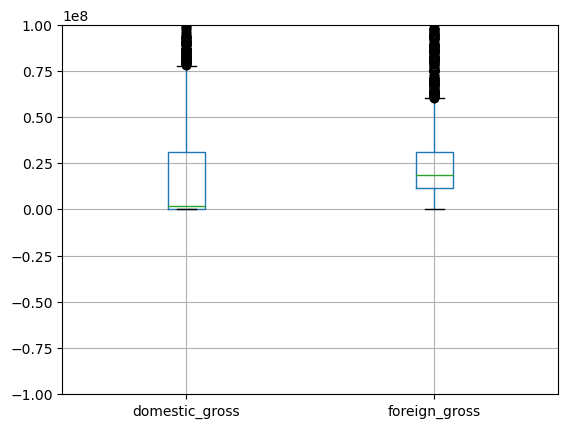

In [345]:
#checking outliers using a box plot
fig,ax = plt.subplots()
ax.set_ylim(-1.0e+08,1.0e+08)
final_joined_df.boxplot(column=['domestic_gross','foreign_gross'], figsize = (20,10));
    


Observations:
- The mean values for the foreign_gross gained from the different movies is  higher than that of the domestic_gross earnings.i.e ~ 53000000 compared to 29700000.
- There are some outliers as observed in the boxplot which represent some moveies that raked in higher, domestic and foreign, gross earnings.



We proceed to group the data using a new column generation.
- new_movie = any movie that is produced past the year 2017 inclusive.

- old_movie = any movie that is produced before the year 2017.


In [391]:
#we proceed to create a new column to indicate the number of years it took for the individual films to be produced.
joined_df.loc[joined_df['year']>=2017,'generation'] = 'new_movie'
joined_df.loc[joined_df['year']<2017,'generation'] = 'old_movie'
joined_df.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,generation
title,,,,,,,,,,,
'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103.0,RAtt.,1300000.0,355000.0,2015,old_movie
"1,000 Times Good Night","1,000 Times Good Night",2013,117.0,"Drama,War",7.1,6848.0,FM,53900.0,18700000.0,2014,old_movie
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383.0,Par.,72100000.0,38100000.0,2016,old_movie
10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484.0,Anch.,203000.0,18700000.0,2012,old_movie
1001 Grams,1001 Grams,2014,93.0,Drama,6.3,1301.0,KL,11000.0,18700000.0,2015,old_movie


In [392]:
#grouping the dataset by old movies vs new movies
generation_mean = joined_df.groupby(['generation']).mean()
generation_mean

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
generation,,,,,,,
new_movie,2016.509863,104.758725,6.508346,37189.180577,3.389805e+07,6.383987e+07,2017.462822
old_movie,2013.336165,103.824529,6.450536,59946.711489,2.863155e+07,4.986268e+07,2013.230144


Observation
- The new movies have an average production time of approximately 1 year.
- The runtimes of both new and old movies is approximately the same at 104~105 minutes.
- New movies have a fairly longer production time of at least one year as compared to older movies, which begin and complete production within the same year.

In [393]:
#assigning the columns in the joined datasets to column1
columns1 = joined_df.columns
columns1

Index(['primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'studio', 'domestic_gross',
       'foreign_gross', 'year', 'generation'],
      dtype='object')

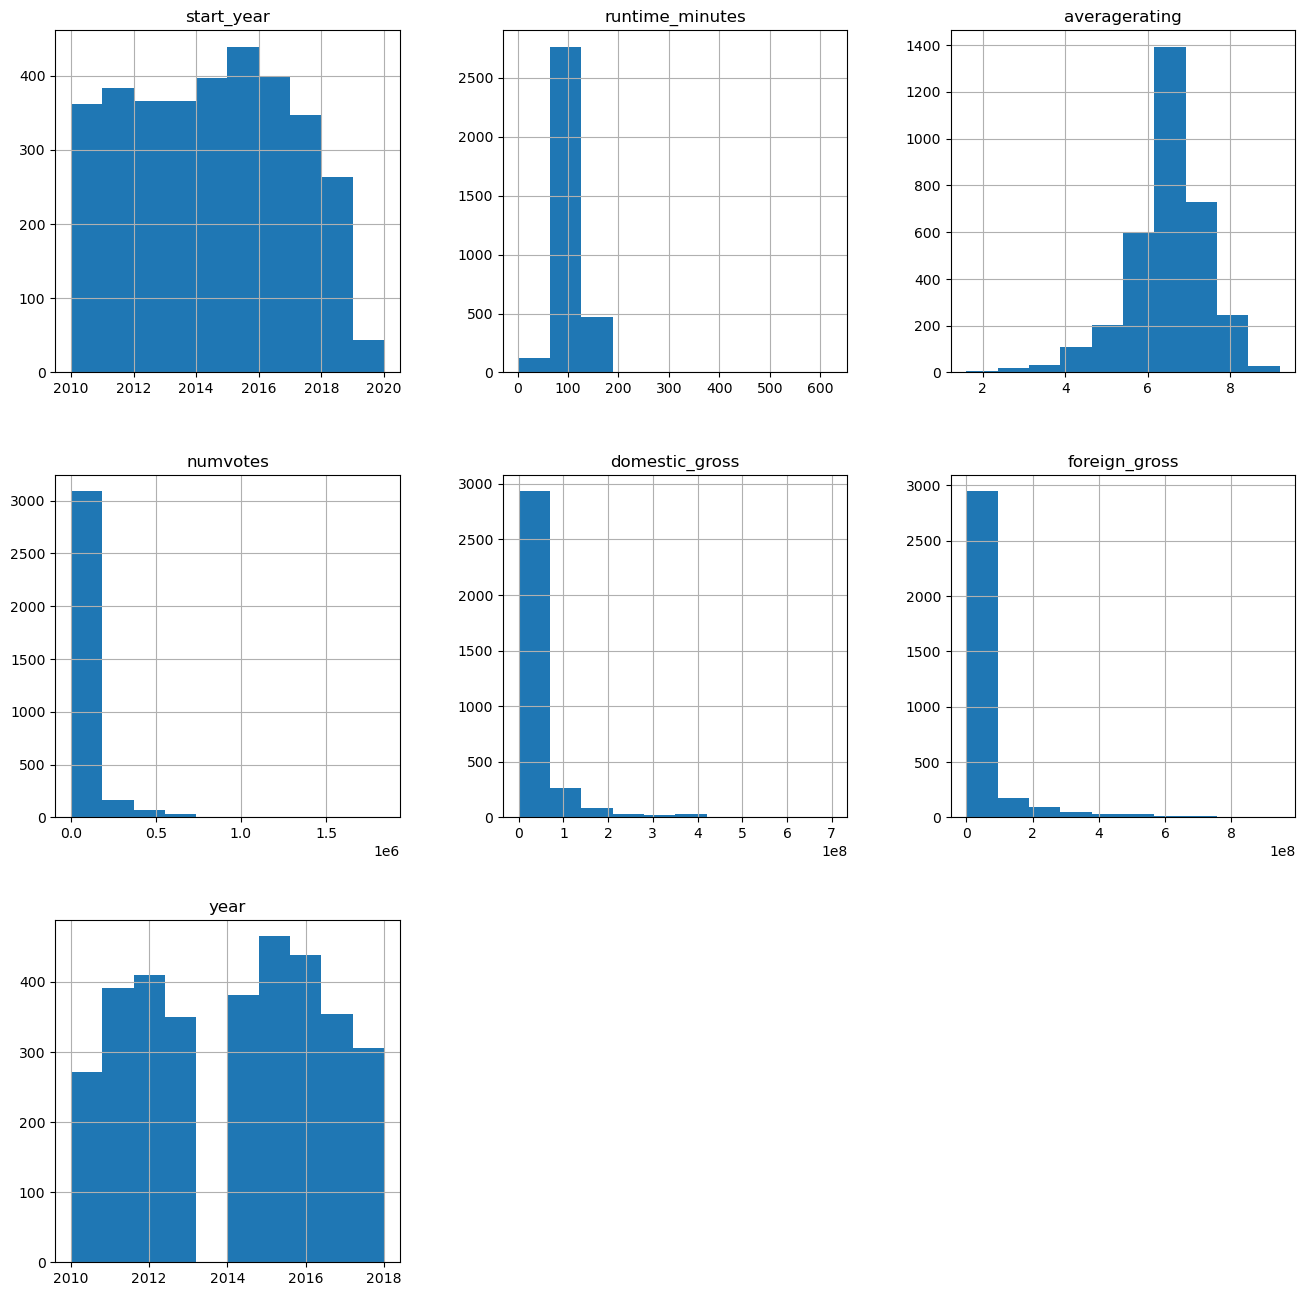

In [435]:
#plotting a histogram to indicate the different frequency values for the columns
columns1 = joined_df.columns
joined_df[columns1].hist(figsize=(16,16));

Observation
- From the histograms, we can identify that most movies were produced between 2014 and 2016
- We can also identify that majority of the movies have a runtime of about 100 minutes.
- Most movies have a rating of between 6 and 7
- There is not sufficient information from the dataset on movies that finished production between 2013 and 2014, despite them having a start year.

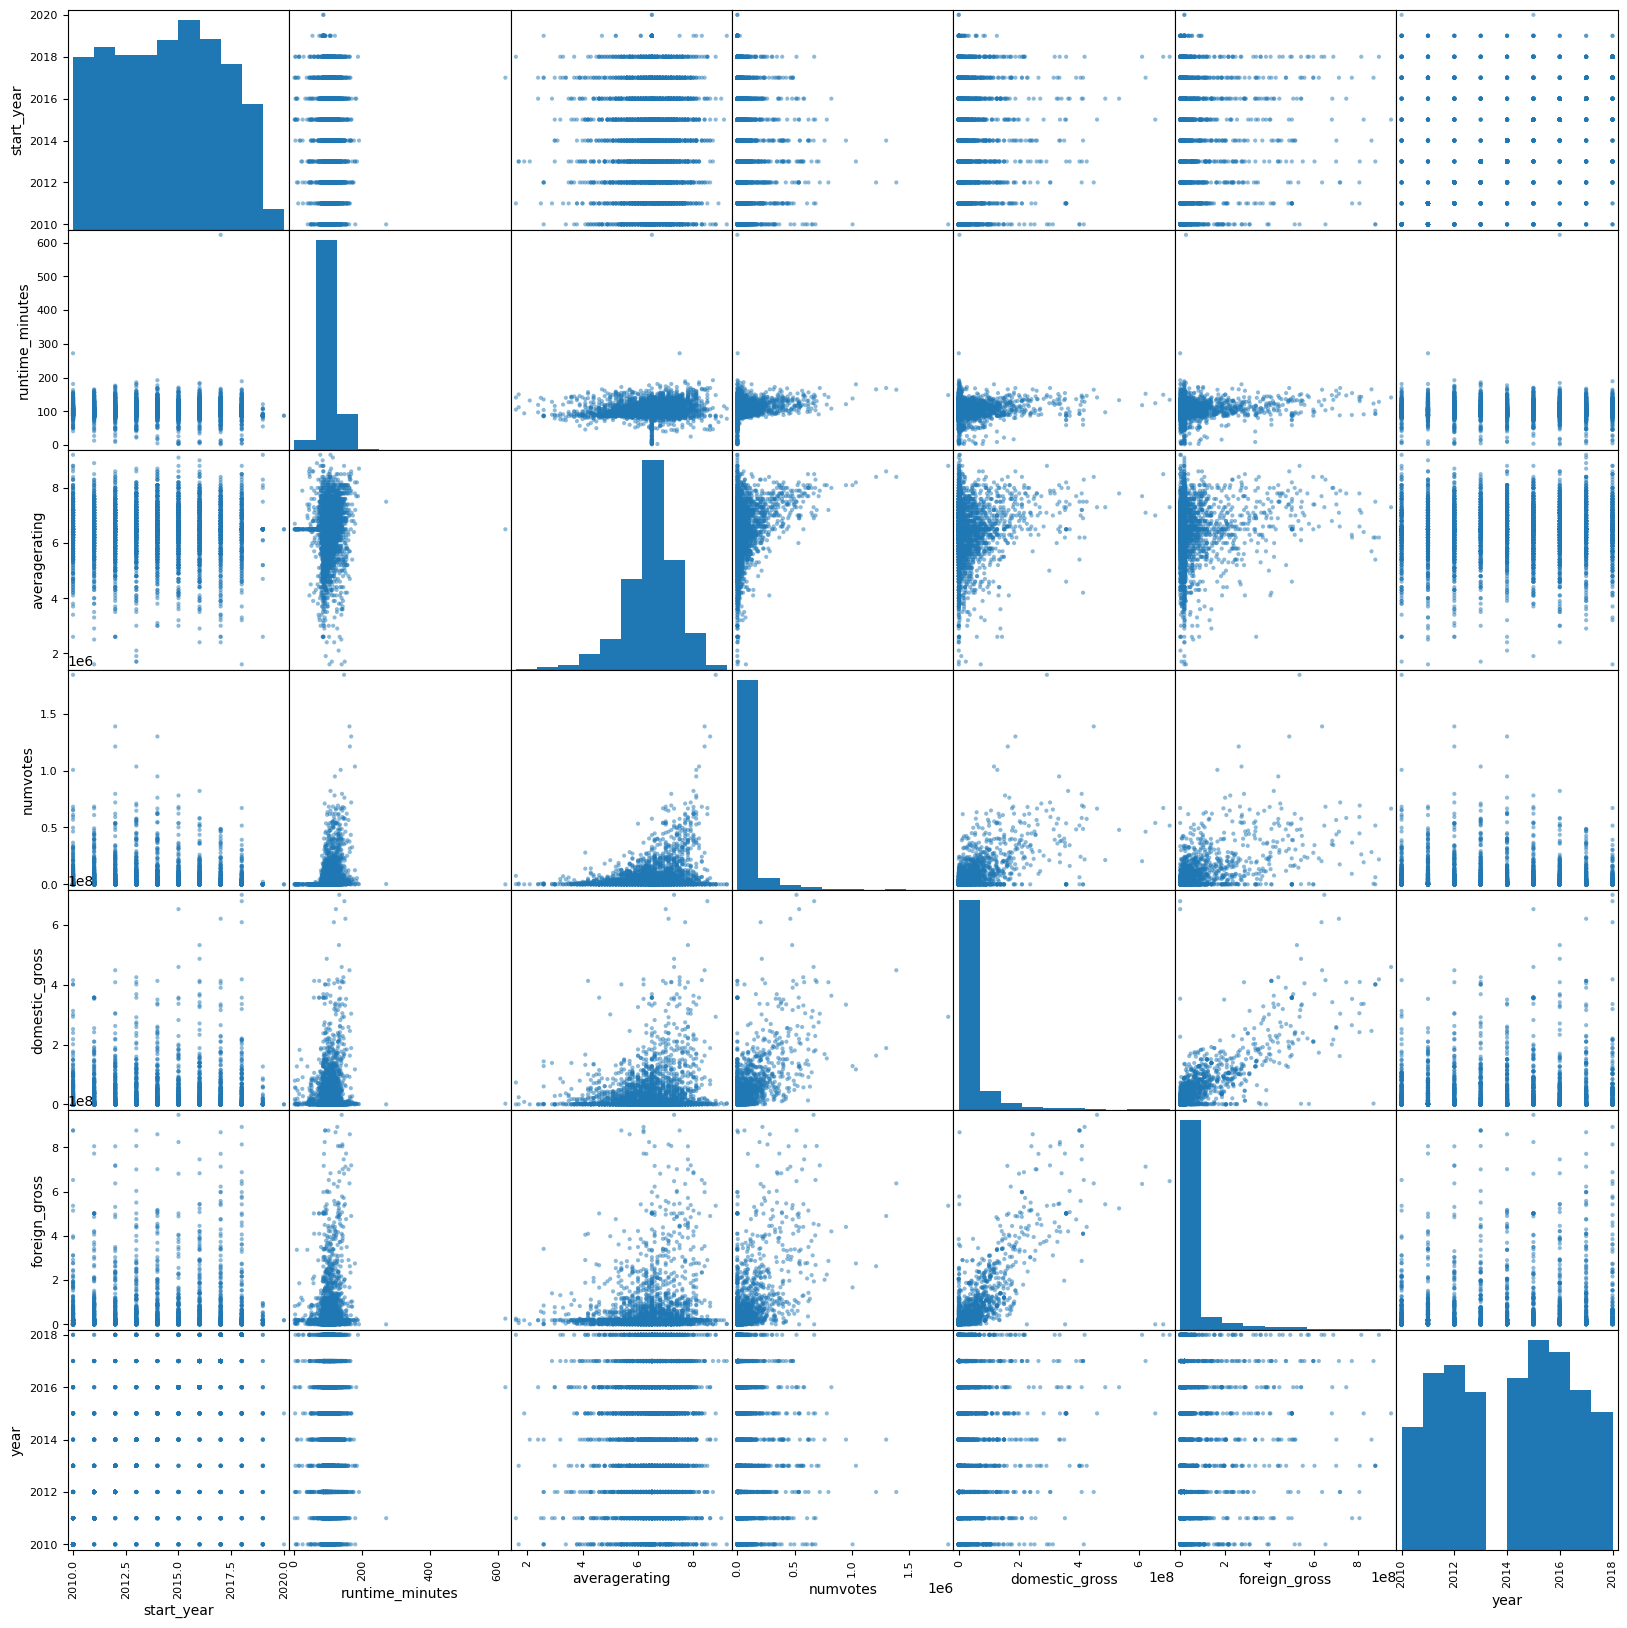

In [384]:
#plotting a scatter matrix to analyze the joined datasets
pd.plotting.scatter_matrix(joined_df, figsize = (20,20));

In [403]:
averagerating_ = joined_df['averagerating']
runtime_minutes_ = joined_df['runtime_minutes']
numvotes_ = joined_df['numvotes']
domestic_gross_ = joined_df['domestic_gross']
foreign_gross_ = joined_df['foreign_gross']
year_ = joined_df['year']
start_year_ = joined_df['start_year']

total_numeric = (averagerating_,runtime_minutes_,numvotes_,domestic_gross_,foreign_gross_,year_,start_year_)

In [422]:
corr_matrix = np.corrcoef(total_numeric)
#correlation between average_rating and runtime_minutes
print('the correlation between average rating and runtime minutes is {}'.format(corr_matrix[0][1]))
#correlation between average_rating and numvotes
print('the correlation between average rating and numvotes is {}'.format(corr_matrix[0][2]))
#correlation between averagerating and domestic gross
print('the correlation between average rating and domestic gross minutes is {}'.format(corr_matrix[0][3]))
#correlation between averagerating and foreign gross
print('the correlation between average rating and foreign gross is {}'.format(corr_matrix[0][4]))
#correlation between runtime_minutes and domestic gross
print('the correlation between runtime and domestic gross is {}'.format(corr_matrix[1][3]))
#correlation between runtime minutes and foreign gross
print('the correlation between runtime minutes and foreign gross is {}'.format(corr_matrix[1][4]))
#correlation between domestic and foreign gross.
print('the correlation between foreign and domestic gross is {}'.format(corr_matrix[3][4]))
#correlation between year and domestic gross
print('the correlation between the year and average rating is {}'.format(corr_matrix[5][3]))
#correlation between year and foreign gross
print('the correlation between year and foreign gross is {}'.format(corr_matrix[5][4]))


the correlation between average rating and runtime minutes is 0.11182239502549188
the correlation between average rating and numvotes is 0.2729976060970373
the correlation between average rating and domestic gross minutes is 0.11532634102620305
the correlation between average rating and foreign gross is 0.10745145065119567
the correlation between runtime and domestic gross is 0.10284885133557307
the correlation between runtime minutes and foreign gross is 0.13379170566340493
the correlation between foreign and domestic gross is 0.8063431112499329
the correlation between the year and average rating is 0.009774103663245668
the correlation between year and foreign gross is 0.04643701799142401


Observations
- Average rating:
    - Has a  minimal positive correlation between the numvotes, and both domestic and foreign gross gains.
- Runtime minutes:
    - Has a minimal positive correlation with foreign and domestic gross gains.
- Domestic_gross:
    - Has a strong positive correlation witht foreign gross.
- Year:
    - Has almost zero correlation with the domestic and foreign gross.

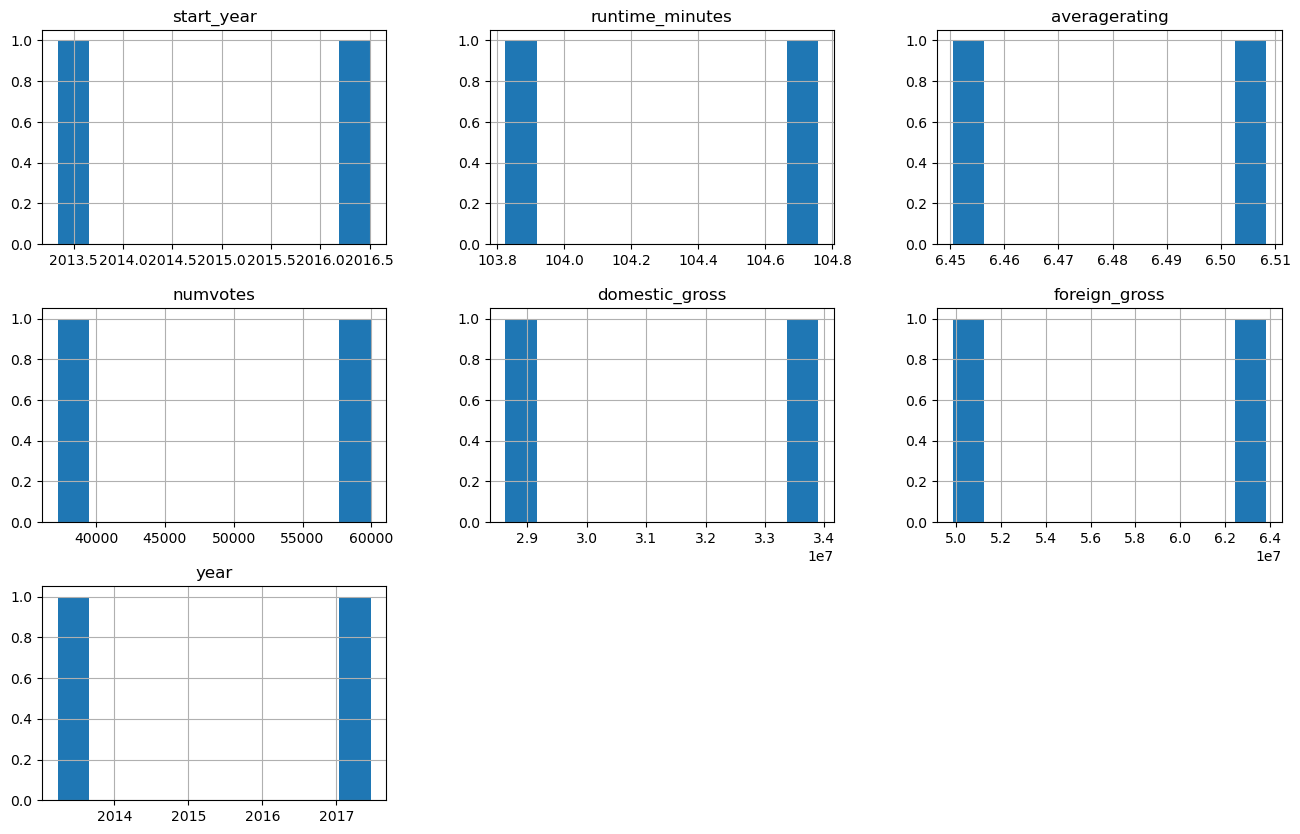

In [376]:
#plotting a histogram to identify the frquency count of the new vs old generation movies
columns2 =  generation_mean.columns
generation_mean[columns2].hist(figsize=(16,10));

Observation
- The histogram does not relay much information of the two generations of movies in respect to the variable columns.

In [428]:
#our final dataset contains no missing values and we can proceed to investigate the set objectives.
#introducing placeholders into our dataset
for col in ['primary_title','start_year', 'runtime_minutes','genres','averagerating','numvotes','studio','domestic_gross','foreign_gross','year']:
    print('Values for {}:\n{}\n\n'.format(col, final_joined_df[col].unique()))

Values for primary_title:
["'71" '1,000 Times Good Night' '10 Cloverfield Lane' ... 'Zookeeper'
 'Zoolander 2' 'Zootopia']


Values for start_year:
[2014 2013 2016 2011 2018 2010 2012 2017 2015 2019 2020]


Values for runtime_minutes:
[ 99. 117. 103. 100.  93. 102.  90. 130. 134.  94. 141. 114.  86. 121.
  91.  96. 109. 149.  97. 119. 112.  82.  98.  92.  83. 110.  89. 128.
 113.  88.  95.  77. 105. 107. 104. 124.  46. 125. 111. 118. 146.  85.
 145.  70. 101. 120. 106. 116. 108.  74. 122. 137.  80. 123.  87. 115.
 160.  84.  55.  54.  65.  72. 158. 157. 174.  81. 139. 132. 126. 163.
 138. 133. 127.  76. 151. 142. 129.  60. 181. 143. 131.  61. 136.  68.
 167. 159.  79. 153.   6. 161.  78. 140.  16.  52. 155. 152. 186. 148.
 135. 164. 180. 150. 165.  73. 147.  58.  75. 172.  29. 144. 192.  47.
 170.  71.  57. 623. 154.  38.  45.  50.   5.  51.  26.  59. 169.  14.
 176.  11.  44.  49.  40.  56.  53.   4.  69.  34. 168.   3.  17.   9.
 184. 156.  15.  66. 272.  22.  62. 189.  27.  39.  41.

In [231]:
#getting unique values for the genres column
joined_df['genres'].unique()
print (joined_df['genres'].value_counts())

Drama                         392
Documentary                   168
Comedy,Drama,Romance          138
Comedy,Drama                  137
Drama,Romance                 115
                             ... 
Action,Romance                  1
Action,Comedy,Sport             1
Action,Biography,History        1
Action,Documentary,History      1
Sport                           1
Name: genres, Length: 332, dtype: int64


Observation:
    -From the information above, we can conclude that the highest produced genre of films are; Drama, Documentaries, Comedy and Romance films.
    -The least produced films were Action- Romance, Action-Comedy-Sport, Action-Biography-History and Sport.

In [430]:
#grouping the dataset with reference to the genres
grouped_genres = joined_df.groupby('genres').mean()
grouped_genres.sort

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
genres,,,,,,,
Action,2013.772727,111.500000,6.186364,5700.181818,1.580743e+07,4.168636e+07,2014.454545
"Action,Adventure",2012.666667,113.666667,5.866667,4892.333333,5.408333e+04,1.314117e+07,2013.333333
"Action,Adventure,Animation",2014.136364,100.227273,7.354545,124986.818182,9.930275e+07,1.983182e+08,2014.454545
"Action,Adventure,Biography",2015.500000,128.750000,7.000000,191598.000000,6.005725e+07,1.470250e+08,2015.750000
"Action,Adventure,Comedy",2015.406250,110.718750,6.271875,181259.937500,9.913976e+07,2.070344e+08,2015.593750
...,...,...,...,...,...,...,...
Sci-Fi,2015.200000,76.600000,5.920000,733.600000,8.302002e+07,9.682000e+07,2016.800000
Sport,2014.000000,114.000000,7.900000,77.000000,5.300000e+06,1.870000e+07,2012.000000
Thriller,2014.447368,90.631579,5.973684,1228.631579,1.674009e+07,3.097722e+07,2014.078947


In [442]:
#Sorting the combined dataset to identify the highest grossing movies
joined_df.sort_values(by=['domestic_gross', "foreign_gross"], ascending=False)

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,generation
title,,,,,,,,,,,
Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,BV,700100000.0,646900000.0,2018,new_movie
Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,BV,678800000.0,1369.5,2018,new_movie
Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652300000.0,1019.4,2015,old_movie
Star Wars: The Last Jedi,Star Wars: The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903.0,BV,620200000.0,712400000.0,2017,new_movie
Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510.0,BV,608600000.0,634200000.0,2018,new_movie
...,...,...,...,...,...,...,...,...,...,...,...
2:22,2:22,2017,98.0,Thriller,5.8,16318.0,Magn.,400.0,18700000.0,2017,new_movie
Apartment 143,Apartment 143,2011,80.0,"Horror,Thriller",5.1,10575.0,Magn.,400.0,426000.0,2012,old_movie
Satanic,Satanic,2016,85.0,Horror,3.7,5381.0,Magn.,300.0,18700000.0,2016,old_movie


Observation:
    - The top grossing movie is Black Panther and the least grossing movie is Storage 24.
    - Most of the highest grossing films were movies that were produced post 2017 inclusive. Whereas, the least grossing films were movies that were produced pre-2017.

In [443]:
#Sorting the combined dataset to identify the highest grossing genre of movies
grouped_genres.sort_values(by=['domestic_gross', "foreign_gross"], ascending=False)

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
genres,,,,,,,
"Adventure,Drama,Sport",2010.0,93.000000,6.200000,62311.000000,4.007000e+08,8.757000e+08,2013.000000
"Action,Adventure,Sci-Fi",2014.0,130.617021,6.776596,419616.851064,2.345681e+08,3.538320e+08,2014.085106
"Adventure,Drama,Sci-Fi",2014.5,156.500000,8.300000,989725.000000,2.082000e+08,4.455500e+08,2014.500000
"Documentary,Drama,Sport",2014.5,90.500000,7.000000,3570.500000,2.067250e+08,2.140000e+08,2015.000000
"Fantasy,Romance",2011.0,107.000000,6.400000,2866.000000,2.005215e+08,4.585000e+08,2012.500000
...,...,...,...,...,...,...,...
"Documentary,History,Thriller",2013.0,84.000000,6.700000,128.000000,7.100000e+03,1.870000e+07,2014.000000
"Drama,War,Western",2014.0,101.000000,7.200000,5851.000000,5.300000e+03,1.870000e+07,2015.000000
"Comedy,Crime,Mystery",2011.0,87.000000,6.400000,30352.000000,5.000000e+03,3.100000e+06,2011.000000


Observation:

    - The highest grossing genre of films were Adventure-Drama-Sport and the least grossing genre of films was Action-Horro-Mystery

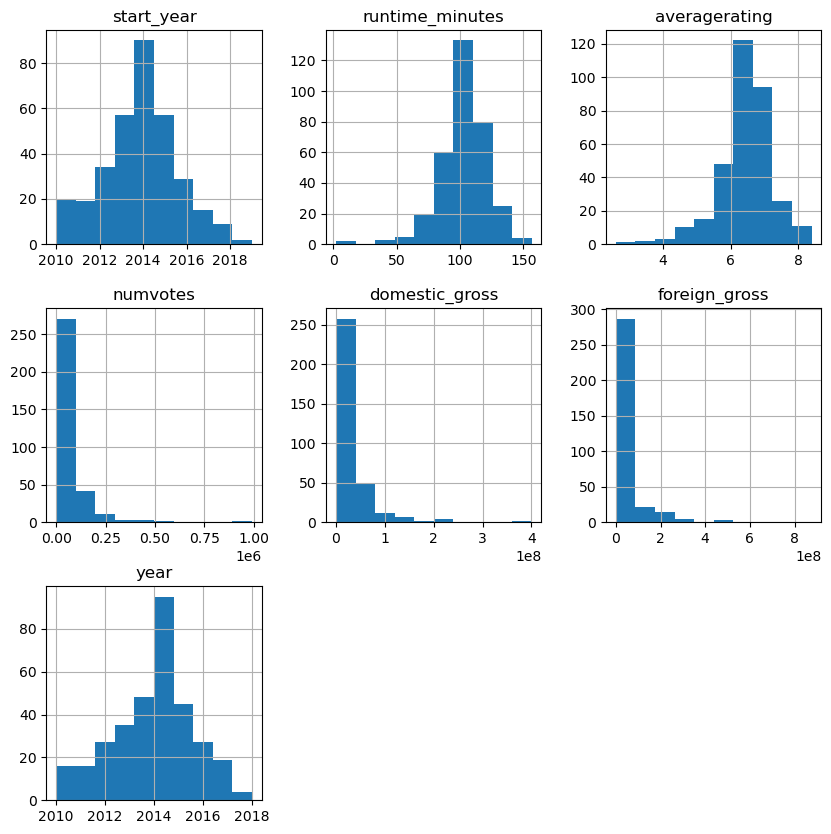

In [445]:
grouped_genres.hist(figsize = (10,10));

Summary

The highest and lowest grossing films from the data were; Black Panther and Storage 24 respectively.

The highest and lowest grossing genres from the data were; Adventure-Drama-Sport and Action-Horror-Mystery respectively.

The highest produced genre of films are; Drama, Documentaries, Comedy and Romance films.

The least produced films were Action- Romance, Action-Comedy-Sport, Action-Biography-History and Sport.

Average rating:- Has a minimal positive correlation between the numvotes, and both domestic and foreign gross gains.



Recommendations

It will be prudent to invest in Adventure, Drama or Sport movies as they are the highest grossing genres.

Most films produced have an average runtime of 104 minutes and an average production time of 1-2 years. Therefore, Microsoft should seek to produce films that are within this time range. There is no significant increase in gross earnings outisde this range.

The foreign gross earnings are geerally higher than the domestic gross earnings, therefore further marketing could be done to drive doemstic gross earnings higher.

